# WORK IN PROGRESS
## Studio dell'importanza delle feature tramite il random forest regressor
### da vedere dopo

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
# %pip install -U scikit-learn


In [57]:
df_labeled = pd.read_parquet('../../data/processed/feature_extracted_data.parquet')

In [58]:
df_labeled.columns

Index(['id_prenotazione', 'id_paziente', 'data_nascita', 'sesso',
       'regione_residenza', 'tipologia_servizio', 'descrizione_attivita',
       'data_contatto', 'tipologia_struttura_erogazione',
       'id_professionista_sanitario', 'tipologia_professionista_sanitario',
       'data_erogazione', 'durata_erogazione_sec', 'fascia_eta', 'anno',
       'quadrimestre', 'incremento_teleassistenze'],
      dtype='object')

In [59]:
df_app = df_labeled.copy()
df_app = df_app.drop(['id_prenotazione', 'id_paziente', 'data_nascita', 'data_contatto', 'data_erogazione', 'id_professionista_sanitario'], axis=1)

In [60]:
df_app['durata_erogazione_sec'] =  df_app.durata_erogazione_sec.astype(int)

In [61]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460509 entries, 0 to 460508
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   sesso                               460509 non-null  object
 1   regione_residenza                   460509 non-null  object
 2   tipologia_servizio                  460509 non-null  object
 3   descrizione_attivita                460509 non-null  object
 4   tipologia_struttura_erogazione      460509 non-null  object
 5   tipologia_professionista_sanitario  460509 non-null  object
 6   durata_erogazione_sec               460509 non-null  int64 
 7   fascia_eta                          460509 non-null  object
 8   anno                                460509 non-null  int32 
 9   quadrimestre                        460509 non-null  int32 
 10  incremento_teleassistenze           460509 non-null  object
dtypes: int32(2), int64(1), object(8)
memory

In [62]:
# One-Hot Encoding
# # Seleziona le colonne categoriche
# categorical_cols = ['sesso', 'regione_residenza', 'tipologia_servizio', 'descrizione_attivita', 'tipologia_struttura_erogazione', 'tipologia_professionista_sanitario', 'fascia_eta']

# # One-Hot Encoding
# encoder = OneHotEncoder(drop='first')
# encoded_categorical_cols = encoder.fit_transform(df_app[categorical_cols])

In [63]:
from sklearn.preprocessing import LabelEncoder

# Seleziona le colonne categoriche
categorical_cols = ['sesso', 'regione_residenza', 'tipologia_servizio', 'descrizione_attivita', 'tipologia_struttura_erogazione', 'tipologia_professionista_sanitario', 'fascia_eta']

# Creare un'istanza di LabelEncoder
label_encoder = LabelEncoder()

# Applicare il LabelEncoder a ciascuna colonna categoriale
for col in categorical_cols:
    df_app[col] = label_encoder.fit_transform(df_app[col])

In [64]:
df_app.shape

(460509, 11)

In [65]:
from sklearn.preprocessing import StandardScaler

# Separa le colonne numeriche
numerical_cols = df_app.select_dtypes(include=['float64', 'int64', 'int32']).columns

print(numerical_cols)

# Inizializza lo StandardScaler
scaler = StandardScaler()

# Applica lo scaler solo alle colonne numeriche
df_app[numerical_cols] = scaler.fit_transform(df_app[numerical_cols])


Index(['sesso', 'regione_residenza', 'tipologia_servizio',
       'descrizione_attivita', 'tipologia_struttura_erogazione',
       'tipologia_professionista_sanitario', 'durata_erogazione_sec',
       'fascia_eta', 'anno', 'quadrimestre'],
      dtype='object')


In [66]:
df_app.shape

(460509, 11)

In [67]:
# Converti in DataFrame
# encoded_df = pd.DataFrame(encoded_categorical_cols.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

In [68]:
# encoded_df.shape

In [77]:
X = df_app.copy().drop(['incremento_teleassistenze'], axis=1)

In [78]:
# Unisci con le colonne numeriche
# Con reset_index ignoriamo gli indici originali e usiamo nuovi indici sequenziali
# X = pd.concat([encoded_df.reset_index(drop=True), df_app[['durata_erogazione_sec', 'anno', 'quadrimestre']].reset_index(drop=True)], axis=1)

In [79]:
y = df_app['incremento_teleassistenze']

In [80]:
X.shape

(460509, 10)

In [81]:
y.shape

(460509,)

In [82]:
# Inizializza e addestra il modello di classificazione
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [83]:
# Ottieni l'importanza delle feature
feature_importance = model.feature_importances_

# Creazione di un DataFrame per visualizzare i risultati
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

In [87]:
feature_importanti = importance_df.sort_values(by=['Importance'])
feature_importanti.sort_values(by=['Importance'], ascending=False)

,Feature,Importance
7,fascia_eta,0.374366
9,quadrimestre,0.362412
1,regione_residenza,0.194428
6,durata_erogazione_sec,0.027851
3,descrizione_attivita,0.015149
4,tipologia_struttura_erogazione,0.010411
8,anno,0.007936
5,tipologia_professionista_sanitario,0.005277
0,sesso,0.002170
2,tipologia_servizio,0.000000


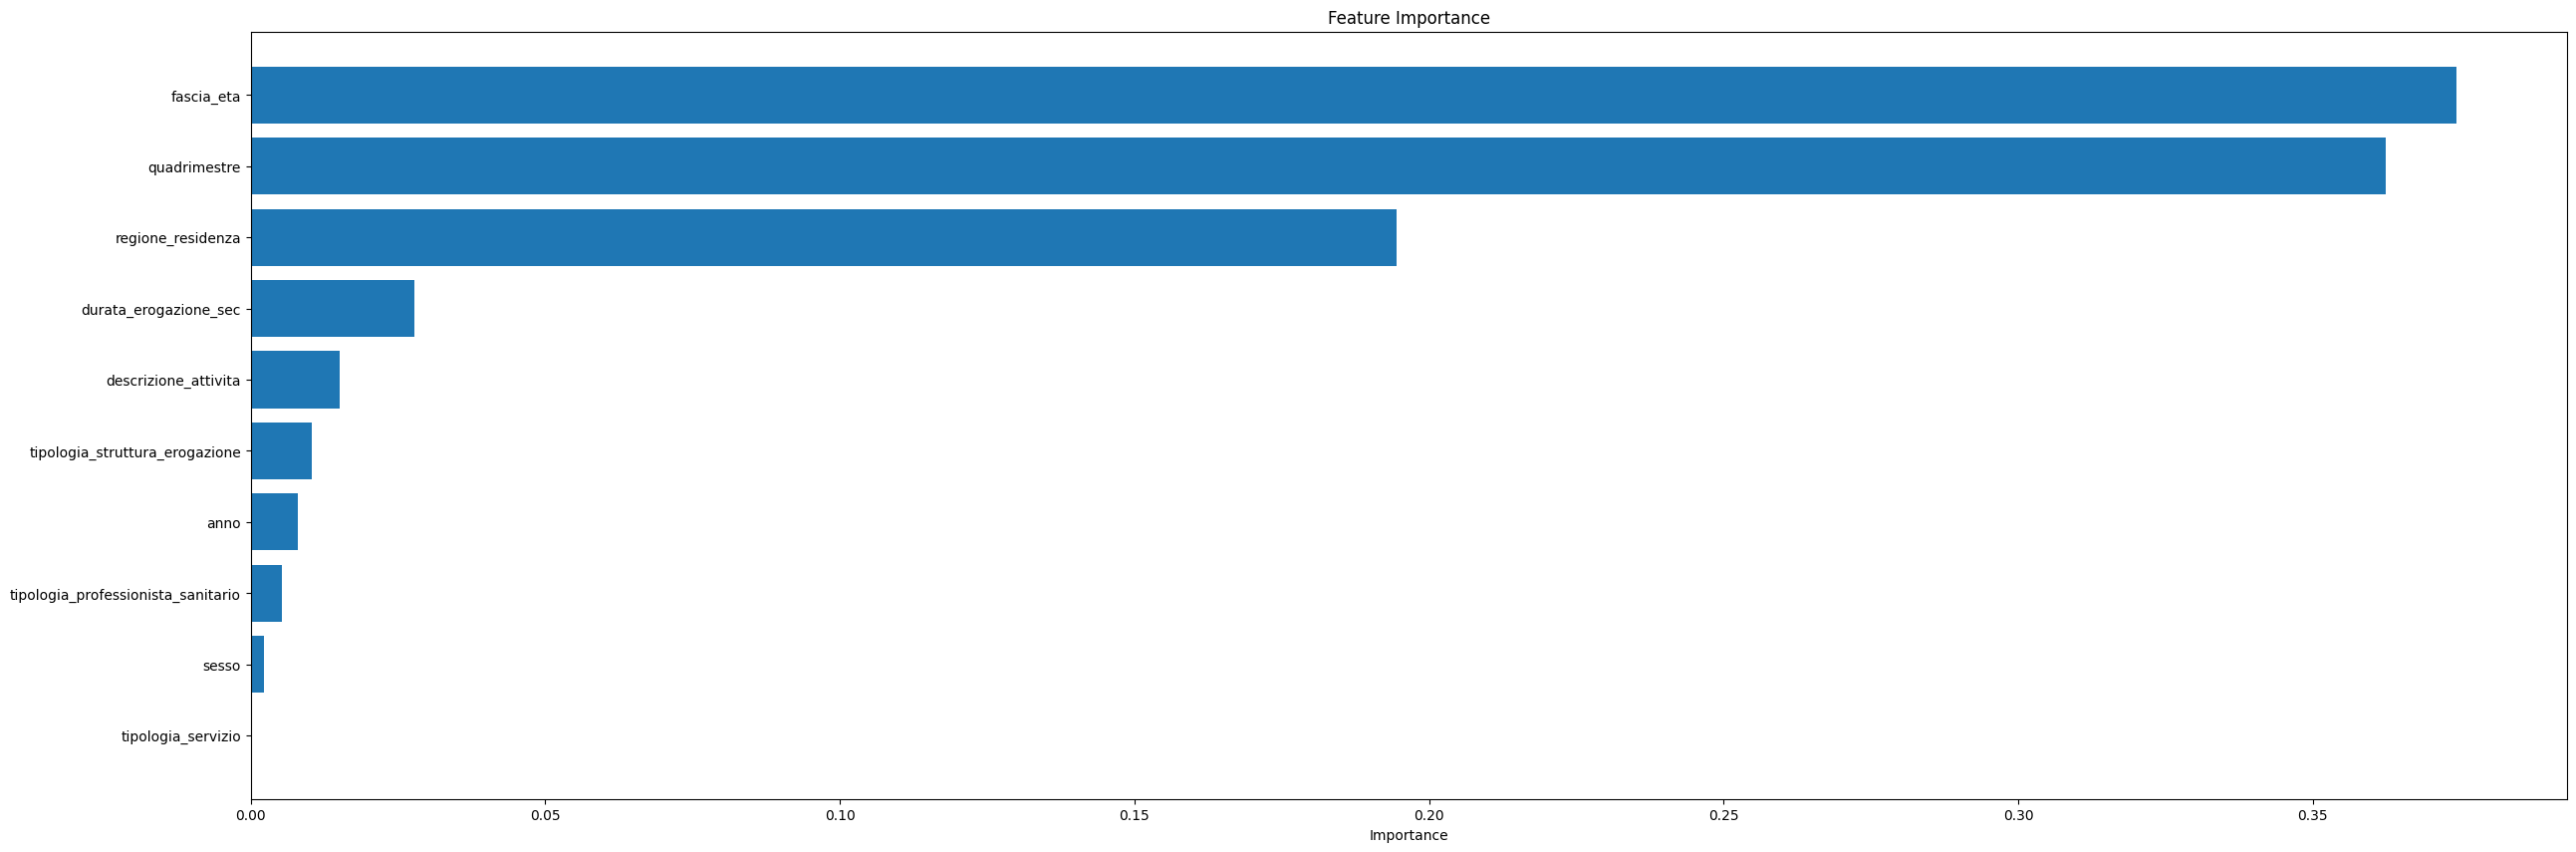

In [86]:
# Visualizzazione con un grafico a barre
plt.figure(figsize=(30, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'].head(15))
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inverte l'asse y per avere la feature più importante in cima
plt.show()